In [1]:
import pandas as pd
import numpy as np

Reading the **dataset**

In [2]:
df=pd.read_excel('/content/drive/MyDrive/Project_Data/HR-Employee-Attrition.xlsx')

# Extracting output column **'Attrition'** in variable 'Y'

In [3]:
Y = df['Attrition']
Y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
4478    Yes
4479     No
4480     No
4481     No
4482    Yes
Name: Attrition, Length: 4483, dtype: object

In [4]:
X=df.drop('Attrition',axis=1)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,2,...,1.0,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,3,...,4.0,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,4,...,2.0,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,4,...,3.0,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,1,...,4.0,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,19,Travel_Frequently,1367,Research & Development,20.0,4,Technical Degree,1,5077,1,...,4.0,80,2,39,15,3,22,11,2,14
4479,26,Travel_Frequently,338,Research & Development,21.0,1,Life Sciences,1,5078,2,...,1.0,80,3,38,10,2,25,2,1,13
4480,26,Travel_Rarely,1381,Sales,11.0,4,Medical,1,5079,3,...,1.0,80,0,31,7,2,39,1,14,0
4481,37,Travel_Rarely,629,Research & Development,21.0,3,Medical,1,5080,4,...,2.0,80,0,35,15,3,22,11,12,11


In [5]:
df.count()

Age                         4483
Attrition                   4483
BusinessTravel              4483
DailyRate                   4483
Department                  4483
DistanceFromHome            4475
Education                   4483
EducationField              4483
EmployeeCount               4483
EmployeeNumber              4483
EnvironmentSatisfaction     4483
Gender                      4483
HourlyRate                  4474
JobInvolvement              4483
JobLevel                    4483
JobRole                     4483
JobSatisfaction             4483
MaritalStatus               4483
MonthlyIncome               4483
MonthlyRate                 4475
NumCompaniesWorked          4483
Over18                      4483
OverTime                    4483
PercentSalaryHike           4483
PerformanceRating           4483
RelationshipSatisfaction    4474
StandardHours               4483
StockOptionLevel            4483
TotalWorkingYears           4483
TrainingTimesLastYear       4483
WorkLifeBa

In [6]:
import matplotlib.pyplot as plt

In [7]:
LABELS=['Yes','No']

checking imbalance in the **dataset**

Text(0, 0.5, 'Frequency')

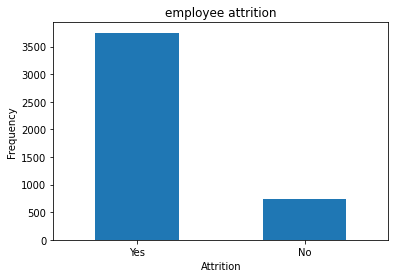

In [8]:
count_classes=pd.value_counts(df['Attrition'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("employee attrition")
plt.xticks(range(2),LABELS)
plt.xlabel("Attrition")
plt.ylabel("Frequency")

In [9]:
Attrition_Yes=df[df['Attrition']=='Yes']
Attrition_No=df[df['Attrition']=='No']

In [31]:
print(Attrition_Yes.shape,Attrition_No.shape, "data is imbalanced")

(731, 35) (3752, 35) data is imbalanced


first we need to clean the data / treat the **missing values**

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            8
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  9
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 8
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    9
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
mean_value_Distance=df['DistanceFromHome'].mean()


In [13]:
df['DistanceFromHome'].fillna(value=mean_value_Distance, inplace=True)

In [14]:
mean_value_HourlyRate=df['HourlyRate'].mean()

In [15]:
df['HourlyRate'].fillna(value=mean_value_HourlyRate, inplace=True)

In [16]:
mean_value_MonthlyRate=df['MonthlyRate'].mean()

In [17]:
df['MonthlyRate'].fillna(value=mean_value_MonthlyRate, inplace=True)

In [18]:
df['RelationshipSatisfaction'].fillna(int(df['RelationshipSatisfaction'].mode()), inplace=True)

In [19]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [20]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1.0,2,Life Sciences,1,1,...,1.0,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8.0,1,Life Sciences,1,2,...,4.0,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2.0,2,Other,1,4,...,2.0,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3.0,4,Life Sciences,1,5,...,3.0,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2.0,1,Medical,1,7,...,4.0,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,19,Yes,Travel_Frequently,1367,Research & Development,20.0,4,Technical Degree,1,5077,...,4.0,80,2,39,15,3,22,11,2,14
4479,26,No,Travel_Frequently,338,Research & Development,21.0,1,Life Sciences,1,5078,...,1.0,80,3,38,10,2,25,2,1,13
4480,26,No,Travel_Rarely,1381,Sales,11.0,4,Medical,1,5079,...,1.0,80,0,31,7,2,39,1,14,0
4481,37,No,Travel_Rarely,629,Research & Development,21.0,3,Medical,1,5080,...,2.0,80,0,35,15,3,22,11,12,11


# we are going to balance the data using **SMOTE** 
(synthetic minority over sampling technique)

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

we cannot apply Smote directly on categorical columns so we need to change them into numeric/ using **"pd.get_dummies(df, columns=)"**

In [23]:
categorical_columns=df.dtypes[df.dtypes == "object"].index.values.tolist()
categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [24]:
df1 = pd.get_dummies(df, columns=categorical_columns)
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1.0,2,1,1,2,94.0,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8.0,1,1,2,3,61.0,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2.0,2,1,4,4,92.0,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3.0,4,1,5,4,56.0,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2.0,1,1,7,1,40.0,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,19,1367,20.0,4,1,5077,1,54.0,4,4,...,0,1,0,0,0,0,1,1,0,1
4479,26,338,21.0,1,1,5078,2,35.0,2,4,...,0,1,0,0,1,0,0,1,1,0
4480,26,1381,11.0,4,1,5079,3,58.0,1,4,...,0,0,0,0,0,0,1,1,0,1
4481,37,629,21.0,3,1,5080,4,44.0,2,1,...,0,0,1,0,0,1,0,1,1,0


In [25]:
df1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

In [26]:
X = df1.drop(['Attrition_No','Attrition_Yes'],axis=1)
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1.0,2,1,1,2,94.0,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8.0,1,1,2,3,61.0,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2.0,2,1,4,4,92.0,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3.0,4,1,5,4,56.0,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2.0,1,1,7,1,40.0,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,19,1367,20.0,4,1,5077,1,54.0,4,4,...,0,1,0,0,0,0,1,1,0,1
4479,26,338,21.0,1,1,5078,2,35.0,2,4,...,0,1,0,0,1,0,0,1,1,0
4480,26,1381,11.0,4,1,5079,3,58.0,1,4,...,0,0,0,0,0,0,1,1,0,1
4481,37,629,21.0,3,1,5080,4,44.0,2,1,...,0,0,1,0,0,1,0,1,1,0


In [27]:
y = df1['Attrition_Yes']
y

0       1
1       0
2       1
3       0
4       0
       ..
4478    1
4479    0
4480    0
4481    0
4482    1
Name: Attrition_Yes, Length: 4483, dtype: uint8

to apply **SMOTE** on under sample to balance the data
first split the dataset ,so that smote could identify the under sample which is to be treated. in our case its **'y'**

In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
# Instantiate SMOTE object and fit on training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [34]:
print("balanced dataset shape:")
X_train_smote.shape,y_train_smote.shape

balanced dataset shape:


((5250, 55), (5250,))